In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from numpy import NaN # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mock-traffic-data/MockTrafficDataForMCNFP.csv


In [2]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.close('all')

df = pd.read_csv('/kaggle/input/mock-traffic-data/MockTrafficDataForMCNFP.csv')

# Drop `id` and `plate_id`
df.drop(['id', 'plate_id'], axis=1, inplace=True)

In [3]:
# View sample of updated data frame
df.head(10)

,time_node_1,time_node_2,time_node_3,time_node_4,time_node_5,time_node_6
0,7:00:03,7:11:02,NaN,7:42:11,NaN,8:44:01
1,7:00:05,NaN,7:47:46,NaN,8:43:54,9:12:38
2,7:00:08,7:08:12,NaN,NaN,8:15:32,8:42:42
3,7:00:12,NaN,7:47:53,NaN,8:44:54,9:13:59
4,7:00:56,NaN,7:52:36,NaN,8:54:49,9:25:31
5,7:01:34,NaN,7:58:06,NaN,9:05:52,9:38:49
6,7:02:20,NaN,7:48:40,7:57:56,NaN,8:50:16
7,7:02:45,7:14:37,NaN,NaN,8:41:25,9:14:56
8,7:02:47,7:16:57,NaN,7:55:46,8:27:41,8:58:20
9,7:02:51,NaN,7:56:28,NaN,9:00:14,9:31:30


In [4]:
# Get list of node columns from dataframe
# Don't really need this, but it might be handy down the line.
node_cols: list = [i for i in df.columns if i.startswith('time_node')]

### We're going to clean the data by replacing any null values with zero and 
### any valid time values with 1 in our node columns
df.loc[:, node_cols] = df[node_cols].replace(pd.NaT, 0,)
df.loc[:, node_cols] = df[node_cols].where(df[node_cols] == 0, 1)

In [5]:
# View sample of updated data frame
df.head(10)

,time_node_1,time_node_2,time_node_3,time_node_4,time_node_5,time_node_6
0,1,1,0,1,0,1
1,1,0,1,0,1,1
2,1,1,0,0,1,1
3,1,0,1,0,1,1
4,1,0,1,0,1,1
5,1,0,1,0,1,1
6,1,0,1,1,0,1
7,1,1,0,0,1,1
8,1,1,0,1,1,1
9,1,0,1,0,1,1


In [6]:
# Get the sum for each time_node
series_obj_1 = df[node_cols].sum().astype(int)

# Convert series to dataframe
df_obj_1 = series_obj_1.to_frame(name='Count')

# Add time_node column and reset the index
df_obj_1['Node_Names'] = df_obj_1.index
df_obj_1.reset_index(drop=True, inplace=True)

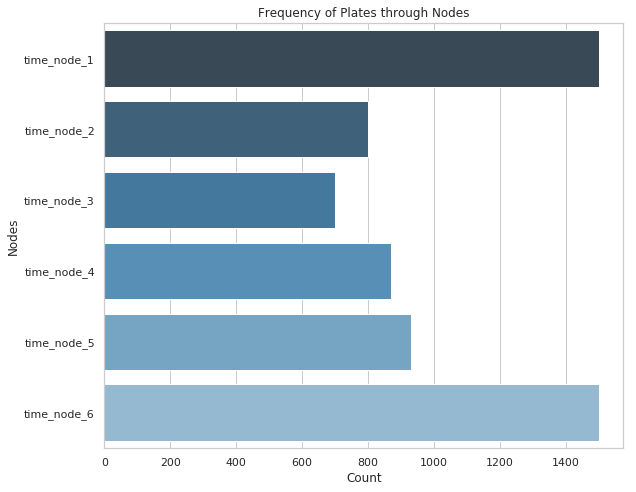

In [7]:
# Plot the value counts
fig, ax1 = plt.subplots(figsize=(9, 7))
sns.barplot(x='Count', y='Node_Names', data=df_obj_1, ci='sd', palette='Blues_d', ax=ax1)
ax1.set_ylabel('Nodes')
ax1.set_xlabel('Count')
ax1.set_title('Frequency of Plates through Nodes')
plt.tight_layout()
plt.show()